In [1]:
import torch

from plot_domination import plot_scalarized_domination
from scalarize.utils.scalarization_functions import HypervolumeScalarization
from scalarize.utils.sampling import sample_ordered_unit_vector, sample_permutations

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
N = 200
X = torch.linspace(-0.05, 1.05, N)
Y = torch.linspace(-0.05, 1.05, N)
A, B = torch.meshgrid(X, Y, indexing="xy")

# (N*N x 2)-dim array
Z = torch.column_stack([A.reshape(N * N, 1), B.reshape(N * N, 1)])

utopia = torch.tensor([[0.8, 0.8]])
nadir = torch.tensor([[0.0, 0.0]])

latent_param = torch.linspace(0.001, 0.999, 2**10)
h_all = torch.column_stack(
    [torch.cos(torch.pi * latent_param / 2), torch.sin(torch.pi * latent_param / 2)]
)

latent_param = torch.linspace(0.001, 0.5, 2**10)
h_lower = torch.column_stack(
    [torch.cos(torch.pi * latent_param / 2), torch.sin(torch.pi * latent_param / 2)]
)

latent_param = torch.linspace(0.5, 0.999, 2**10)
h_upper = torch.column_stack(
    [torch.cos(torch.pi * latent_param / 2), torch.sin(torch.pi * latent_param / 2)]
)

num_samples = 2**10

uv = sample_ordered_unit_vector(d=2, n=num_samples, descending=True)

perms_1 = sample_permutations(weights=torch.tensor([0.7, 0.3]), n=num_samples)
h_pref_1 = torch.row_stack([uv[i, p] for i, p in enumerate(perms_1)])

perms_2 = sample_permutations(weights=torch.tensor([0.3, 0.7]), n=num_samples)
h_pref_2 = torch.row_stack([uv[i, p] for i, p in enumerate(perms_2)])


r1 = torch.tensor([[0.1, 0.3], [0.2, 0.20], [0.3, 0.16], [0.4, 0.05]])

In [3]:
s_fn_dict = {
    r"$\boldsymbol{\rho}=(0.5, 0.5)$": [
        HypervolumeScalarization(weights=h_all, ref_points=nadir),
        None,
        nadir,
        None,
    ],
    r"$\boldsymbol{\rho}=(1, 0)$": [
        HypervolumeScalarization(weights=h_upper, ref_points=nadir),
        None,
        nadir,
        None,
    ],
    r"$\boldsymbol{\rho}=(0, 1)$": [
        HypervolumeScalarization(weights=h_lower, ref_points=nadir),
        None,
        nadir,
        None,
    ],
    r"$\boldsymbol{\rho}=(0.7, 0.3)$": [
        HypervolumeScalarization(weights=h_pref_1, ref_points=nadir),
        None,
        nadir,
        None,
    ],
    r"$\boldsymbol{\rho}=(0.3, 0.7)$": [
        HypervolumeScalarization(weights=h_pref_2, ref_points=nadir),
        None,
        nadir,
        None,
    ],
}

C:\Users\Ben\Documents\GitHub\scalarize\notebooks\plot_domination\plot_domination.py:150: UserWarning: No contour levels were found within the data range.
  plt.contour(


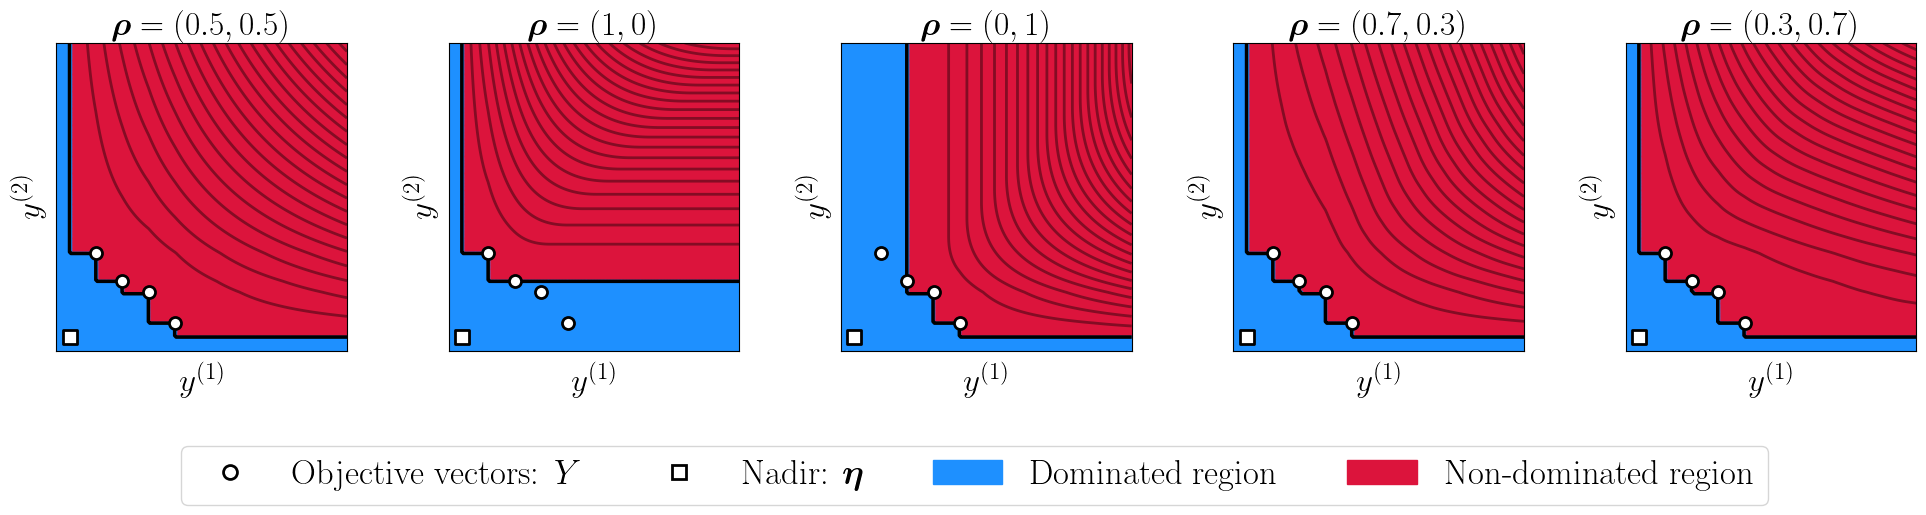

In [4]:
num_rows = 1
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 4), rasterized=True)
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35
)

j = 1
r = r1
for key, value in s_fn_dict.items():
    plt.subplot(num_rows, num_cols, j)
    title = key
    s_fn = value[0]
    utopia_set = value[1]
    nadir_set = value[2]
    unit_vector = value[3]

    Zr = s_fn(r)
    ZY = s_fn(Z)
    max_values = Zr.max(dim=0).values
    ZY = torch.maximum(ZY, max_values).mean(dim=-1)
    Zr = max_values.mean()

    plot_scalarized_domination(
        Z,
        ZY,
        Zr,
        r,
        utopia_set=utopia_set,
        nadir_set=nadir_set,
        unit_vector=unit_vector,
        title=title,
        contours=True,
        X=X,
        Y=Y,
        fontsize=24,
    )
    if key == "Kalai-Smorodinsky":
        t = torch.linspace(-10, 10, 100).unsqueeze(-1)
        line = nadir_set[0, :] + t * (utopia_set - nadir_set)
        plt.plot(
            line[:, 0], line[:, 1], color="w", linestyle="--", linewidth=2.5, zorder=4
        )

    j = j + 1


red_patch = mpatches.Patch(color="crimson", label=r"Non-dominated region")
blue_patch = mpatches.Patch(color="dodgerblue", label=r"Dominated region")
gray_patch = mpatches.Patch(color="#E0E0E0", label=r"Incomparable region", alpha=1)
black_dot = mlines.Line2D(
    [],
    [],
    color="w",
    marker="o",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Objective vectors: $Y$",
)

white_star = mlines.Line2D(
    [],
    [],
    color="w",
    marker="*",
    linestyle="None",
    markersize=15,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Utopia: $\boldsymbol{\upsilon}$",
)
white_square = mlines.Line2D(
    [],
    [],
    color="w",
    marker="s",
    linestyle="None",
    markersize=10,
    markeredgecolor="k",
    markeredgewidth=2,
    label=r"Nadir: $\boldsymbol{\eta}$",
)

axes[0].legend(
    handles=[black_dot, white_square, blue_patch, red_patch],
    ncol=5,
    fontsize=25,
    loc=(0.43, -0.5),
)

plt.show()